<a href="https://colab.research.google.com/github/KiyongAhn/rep01/blob/master/25_CNN_More.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN & More

### Your name :

#### 쉽지만 중요한 코너!

--------------------------
Rayleigh Kim @ D:plus

### 라이브러리 로딩

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, BatchNormalization, Activation, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
from keras import backend
from sklearn.model_selection import train_test_split

import random as rd

from sklearn.metrics import accuracy_score

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 1546
다음 그림은 숫자 2 입니다.


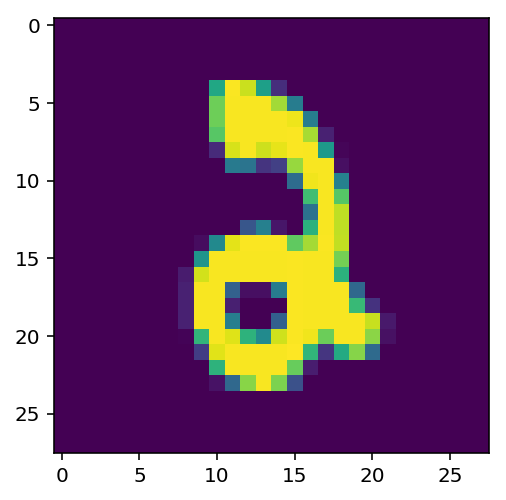

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
plt.imshow(test_x[id])
plt.show()

### Keras에서 Convolutional Layer를 사용하기 위한 reshape!

In [0]:
# One Hot Encoding
train_y = keras.utils.to_categorical(train_y)
test_y  = keras.utils.to_categorical(test_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0],28,28,1)
test_x  = test_x.reshape(test_x.shape[0],28,28,1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


이미지 값을 0 ~ 1 사이 값을 갖도록 스케일 조정!

In [0]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


In [0]:
max_num = train_x.max()

train_x = train_x/max_num
test_x  = test_x/max_num

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


### Sequential 을 이용하여 모델링 하자!

CNN에 관한 것만 추가가 된다.
[여기](https://keras.io/layers/convolutional/)를 적극적으로 참고하자

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = keras.models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

model.add( layers.Conv2D(filters = 32,
                         kernel_size = (3, 3),
                         activation='relu',
                         input_shape = (28, 28, 1))  )

model.add( layers.Conv2D(filters = 32,
                         kernel_size = (3, 3),
                         activation='relu')  )

model.add( MaxPool2D((2,2)) )

model.add( Dropout(0.20) )

model.add( layers.Conv2D(filters = 64,
                         kernel_size = (3, 3),
                         activation='relu',
                         padding='same')  )

model.add( layers.Conv2D(filters = 64,
                         kernel_size = (3, 3),
                         activation='relu',
                         padding='same')  )

model.add( MaxPool2D((2,2)) )

model.add( Dropout(0.25) )

model.add( layers.Conv2D(filters = 128,
                         kernel_size = (3, 3),
                         activation='relu',
                         padding='same')  )

model.add( Dropout(0.25) )

model.add( layers.Flatten() )

model.add( layers.Dense(1024, activation = 'relu') )

model.add( BatchNormalization()  )

model.add( Dropout(0.25) )

model.add( layers.Dense(10, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics=['accuracy'])

## training with Data Augmentation

In [0]:
lr_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                 patience = 3,
                                 verbose = 1,
                                 factor = 0.5,
                                 min_lr = 0.00001)

es = EarlyStopping(monitor   = 'val_loss',
                   min_delta = 0, # 개선되고 있다고 판단하기 위한 최소 변화량
                   patience  = 6, # 개선 없는 epoch 얼마나 기달려 줄거야?
                   verbose   = 1
                  )

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

Note:<br>
* rotation_range: 인풋으로 이미지를 회전해서 넣어줌. 예를 들면 1도씩만 해도 360장을 넣게 됨. 그러나 조심히 써야한다.
* zoom_range: 줌을 해주어서 인풋

강사는 데이터  Augmentation을 데이터 뻥튀기라고 함

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### Real time data augmentation 을 위하여!

validation 셋을 따로 만들어 두자.

In [0]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1, random_state = 2018)

In [0]:
# 데이터를 넣어서 학습시키자!
datagen.fit(train_x)


history = model.fit_generator(datagen.flow(train_x, train_y, batch_size = 1024),
                              epochs = 10000, validation_data = (val_x, val_y),
                              verbose = 1, callbacks = [es, lr_reduction]
                             ,steps_per_epoch=10)


Epoch 1/10000
10/10 [==============================] - 3s 250ms/step - loss: 1.3792 - acc: 0.5314 - val_loss: 0.3410 - val_acc: 0.8872
Epoch 2/10000
10/10 [==============================] - 2s 202ms/step - loss: 0.4925 - acc: 0.8434 - val_loss: 0.1537 - val_acc: 0.9513
Epoch 3/10000
10/10 [==============================] - 2s 205ms/step - loss: 0.2745 - acc: 0.9145 - val_loss: 0.1571 - val_acc: 0.9517
Epoch 4/10000
10/10 [==============================] - 2s 204ms/step - loss: 0.2177 - acc: 0.9318 - val_loss: 0.0797 - val_acc: 0.9743
Epoch 5/10000
10/10 [==============================] - 2s 204ms/step - loss: 0.1716 - acc: 0.9465 - val_loss: 0.0830 - val_acc: 0.9740
Epoch 6/10000
10/10 [==============================] - 2s 204ms/step - loss: 0.1392 - acc: 0.9557 - val_loss: 0.0728 - val_acc: 0.9782
Epoch 7/10000
10/10 [==============================] - 2s 209ms/step - loss: 0.1191 - acc: 0.9624 - val_loss: 0.0447 - val_acc: 0.9857
Epoch 8/10000
10/10 [==============================] - 

steps_per_epoch 추가했음 - batch_size와 의미가 중복
과거에는 알아서 해줬는데.. 바뀜


In [0]:
performance_test = model.evaluate(test_x, test_y, batch_size = 100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

10000/10000 [==============================] - 0s 42us/step
Test Loss : 0.030777,  Test Accuracy : 99.030%


* augmentation 으로 MNIST가 99%가 넘었다.
   -> 알고리즘이 아니고 데이터 양이 문제였음

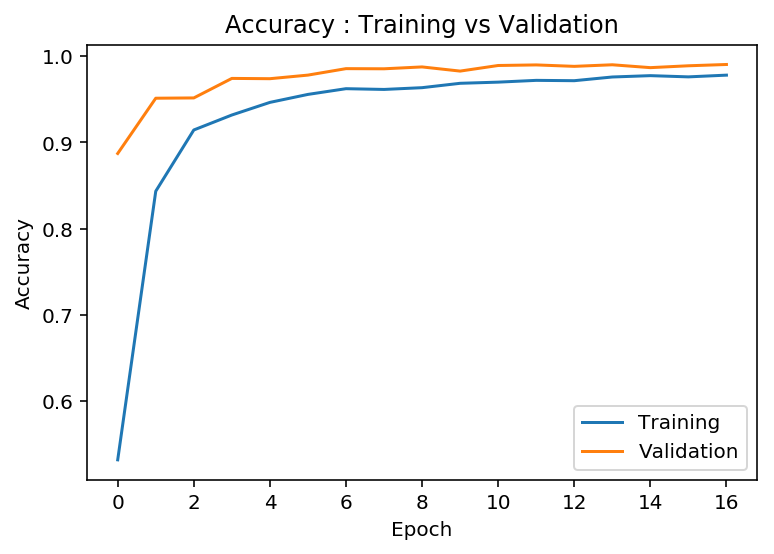

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

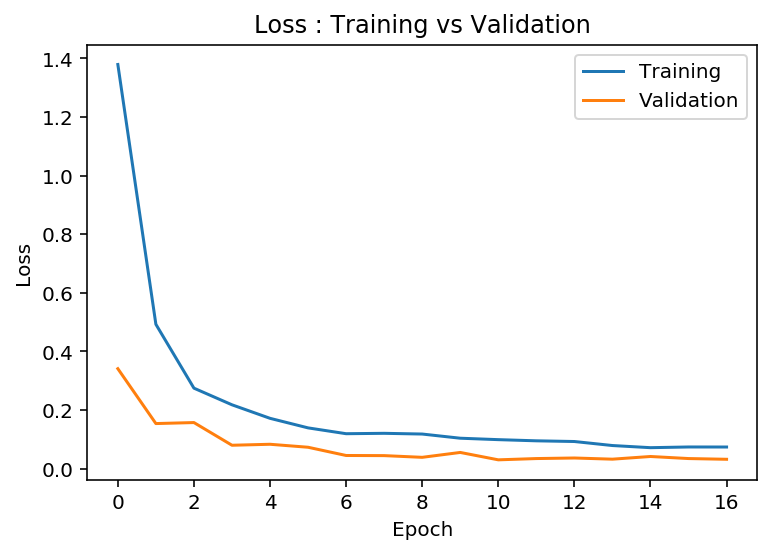

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

## Model Save & Load

In [0]:
model.save('my_first_save.h5')

In [0]:
keras.backend.clear_session()

clear_session으로 다 날렸다.. 그렇지만 다시 로드해서 사용할 수 있음

In [0]:
model = models.load_model('my_first_save.h5')

In [0]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)


logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('CNN')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

CNN
트레이닝 정확도 : 98.94%
테스트 정확도 : 99.03%


id = 581
다음 그림은 숫자 0 입니다.
모델의 예측 : 0
모델의 카테고리별 확률 : [99.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
정답입니다


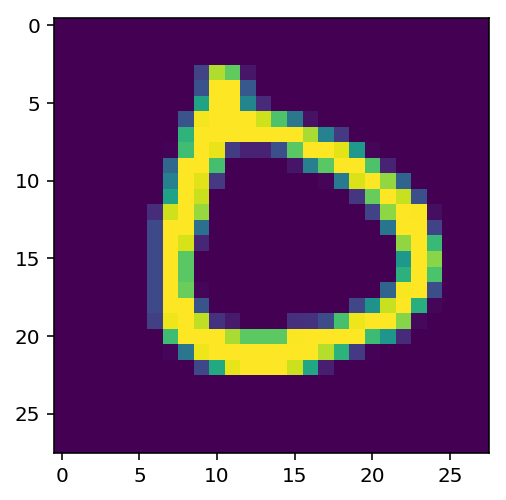

In [0]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y.argmax(axis=1)[id]))
print('모델의 예측 : {}'.format(single_pred_test[id]))
print('모델의 카테고리별 확률 : {}'.format(np.floor(pred_test[id]*100)))
if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 9692
다음 그림은 숫자 9 입니다.
모델의 예측 : 7
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0.  0. 91.  0.  7.]
틀렸어요


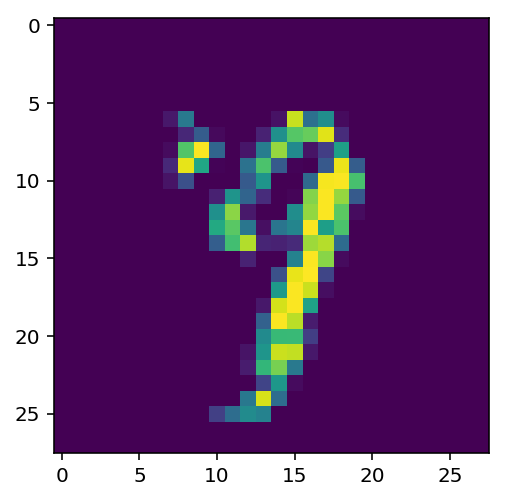

In [0]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y.argmax(axis=1)[id]))
print('모델의 예측 : {}'.format(single_pred_test[id]))
print('모델의 카테고리별 확률 : {}'.format(np.floor(pred_test[id]*100)))
if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

###Note:
* 확률값으로 애매한 데이터의 경우 틀렸음으나 틀릴만한 데이터인지 확인할 수 있음
* 사람도 틀릴만한 것들을 틀린다

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

## 내가 쓴 숫자도 인식 할까?

### 내 그림 파일을 업로드 해둔 곳으로 가자!

In [0]:
from google.colab import drive

In [0]:
# 이미 한 번 마운트 한 경우 두 번 실행하면 안됨!!!!!!!
drive.mount('./now')

Mounted at ./now


In [0]:
ls

11_Colab_Basics.ipynb
12_Python_basics.ipynb
13_Numpy.ipynb
14_Pandas.ipynb
15번연습.ipynb
15_Quick_TF.ipynb
190711_모닝테스트.ipynb
21_Quick_Keras.ipynb
21연습_Quick_Keras.ipynb
22_ANN_with_Keras.ipynb
23_Keras_More_and_Deep_Learning.ipynb
23연습_Keras_More_and_Deep_Learning.ipynb
23_Keras_More_and_Deep_Learning___ORIGINAL.ipynb
24_My_First_CNN.ipynb
25_CNN_More.ipynb
31_Others_CNN.ipynb
32_Transfer_Learning.ipynb
33_AutoEncoder101.ipynb
Graduate_apply.csv.xlsx
memo01.txt
my_first_save.h5
my_mnist/
Stock_Edwards_Lifesciences_corporation.csv.xlsx
Untitled0.ipynb
Untitled1.ipynb


In [0]:
cd now/My Drive

[Errno 2] No such file or directory: 'now/My Drive'
/content/now/My Drive/Deep_Vision


In [0]:
ls

11_Colab_Basics.ipynb
12_Python_basics.ipynb
13_Numpy.ipynb
14_Pandas.ipynb
15번연습.ipynb
15_Quick_TF.ipynb
190711_모닝테스트.ipynb
21_Quick_Keras.ipynb
21연습_Quick_Keras.ipynb
22_ANN_with_Keras.ipynb
23_Keras_More_and_Deep_Learning.ipynb
23연습_Keras_More_and_Deep_Learning.ipynb
23_Keras_More_and_Deep_Learning___ORIGINAL.ipynb
24_My_First_CNN.ipynb
25_CNN_More.ipynb
31_Others_CNN.ipynb
32_Transfer_Learning.ipynb
33_AutoEncoder101.ipynb
Graduate_apply.csv.xlsx
memo01.txt
my_first_save.h5
my_mnist/
Stock_Edwards_Lifesciences_corporation.csv.xlsx
Untitled0.ipynb
Untitled1.ipynb


In [0]:
cd now

[Errno 2] No such file or directory: 'now'
/content/now/My Drive/Deep_Vision


In [0]:
#cd My Drive

In [0]:
cd Deep_Vision

[Errno 2] No such file or directory: 'Deep_Vision'
/content/now/My Drive/Deep_Vision


In [0]:
ls

11_Colab_Basics.ipynb
12_Python_basics.ipynb
13_Numpy.ipynb
14_Pandas.ipynb
15번연습.ipynb
15_Quick_TF.ipynb
190711_모닝테스트.ipynb
21_Quick_Keras.ipynb
21연습_Quick_Keras.ipynb
22_ANN_with_Keras.ipynb
23_Keras_More_and_Deep_Learning.ipynb
23연습_Keras_More_and_Deep_Learning.ipynb
23_Keras_More_and_Deep_Learning___ORIGINAL.ipynb
24_My_First_CNN.ipynb
25_CNN_More.ipynb
31_Others_CNN.ipynb
32_Transfer_Learning.ipynb
33_AutoEncoder101.ipynb
Graduate_apply.csv.xlsx
memo01.txt
my_first_save.h5
my_mnist/
Stock_Edwards_Lifesciences_corporation.csv.xlsx
Untitled0.ipynb
Untitled1.ipynb


### 이미지를 불러와보자

In [0]:
import glob
from keras.preprocessing import image

In [0]:
files = glob.glob('my_mnist/*')

In [0]:
files

['my_mnist/0001.png',
 'my_mnist/0002.png',
 'my_mnist/0008.png',
 'my_mnist/0007.png',
 'my_mnist/0006.png',
 'my_mnist/0009.png',
 'my_mnist/0003.png',
 'my_mnist/0005.png',
 'my_mnist/0010.png',
 'my_mnist/0011.png',
 'my_mnist/0004.png',
 'my_mnist/0023.png',
 'my_mnist/0022.png',
 'my_mnist/0014.png',
 'my_mnist/0017.png',
 'my_mnist/0015.png',
 'my_mnist/0021.png',
 'my_mnist/0020.png',
 'my_mnist/0016.png',
 'my_mnist/0019.png',
 'my_mnist/0018.png',
 'my_mnist/0013.png',
 'my_mnist/0012.png',
 'my_mnist/0029.png',
 'my_mnist/0033.png',
 'my_mnist/0027.png',
 'my_mnist/0028.png',
 'my_mnist/0034.png',
 'my_mnist/0031.png',
 'my_mnist/0032.png',
 'my_mnist/0030.png',
 'my_mnist/0026.png',
 'my_mnist/0025.png',
 'my_mnist/0037.png',
 'my_mnist/0038.png',
 'my_mnist/0039.png',
 'my_mnist/0036.png',
 'my_mnist/0043.png',
 'my_mnist/0040.png',
 'my_mnist/0042.png',
 'my_mnist/0041.png',
 'my_mnist/0024.png',
 'my_mnist/0035.png',
 'my_mnist/0047.png',
 'my_mnist/0049.png',
 'my_mnist

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


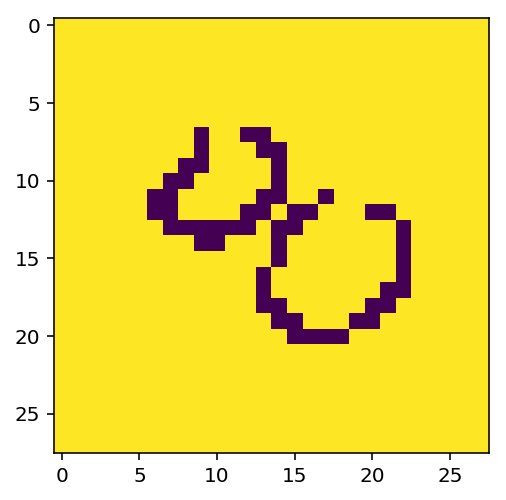

In [0]:
img = image.load_img(files[0], grayscale = True, target_size = (28,28) )
img = image.img_to_array(img)   # numpy array로 바꾼다

plt.imshow(img.reshape(img.shape[0],img.shape[1]))
plt.show()

In [0]:
img = 255-img   # 뒤집는다

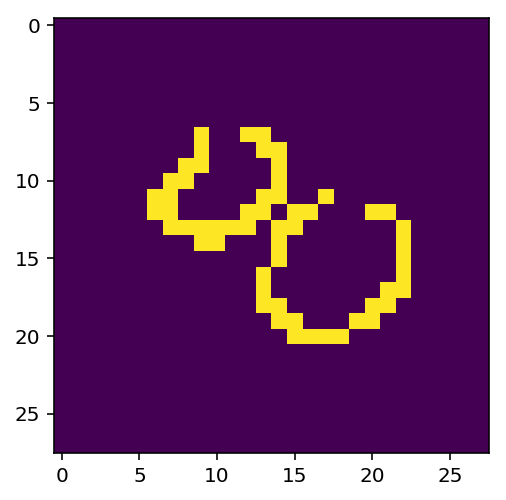

In [0]:
plt.imshow(img.reshape(img.shape[0],img.shape[1]))
plt.show()

In [0]:
model.predict(img.reshape((-1,28,28,1)))[0].argmax()

4

### 이미지가 여러장 이라면

In [0]:
images = []
for path in files :
    img = image.load_img(path, grayscale = True, target_size = (28,28) )
    img = image.img_to_array(img)
    img = 255-img
    images.append(img)

images = np.array(images)    

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [0]:
images.shape

(50, 28, 28, 1)

모델의 예측 : 4
모델의 카테고리별 확률 : [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.]


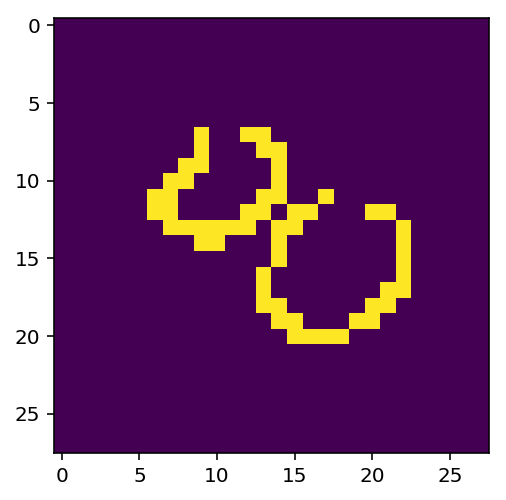

모델의 예측 : 6
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0. 100.   0.   0.   0.]


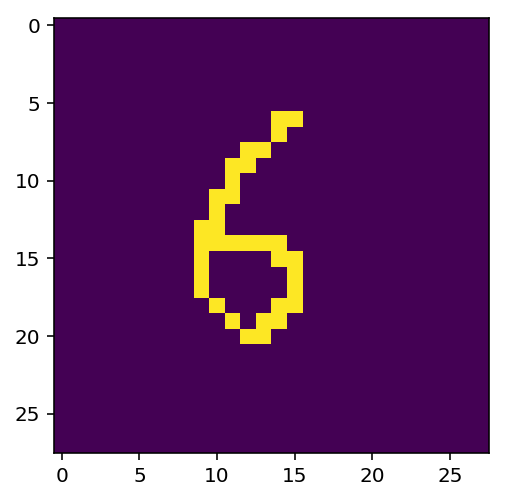

모델의 예측 : 6
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0. 100.   0.   0.   0.]


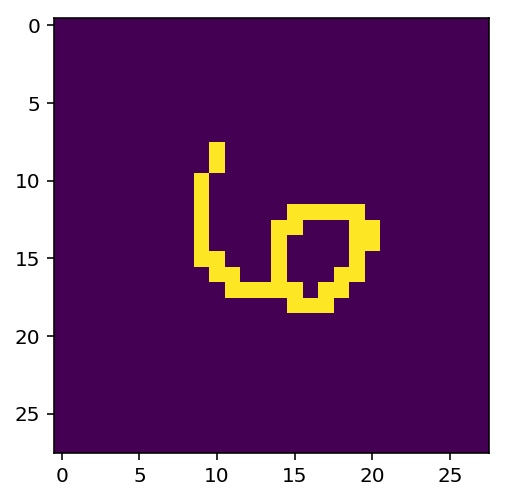

모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]


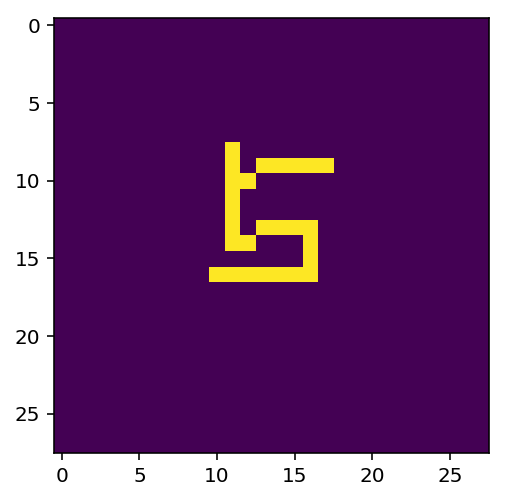

모델의 예측 : 3
모델의 카테고리별 확률 : [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]


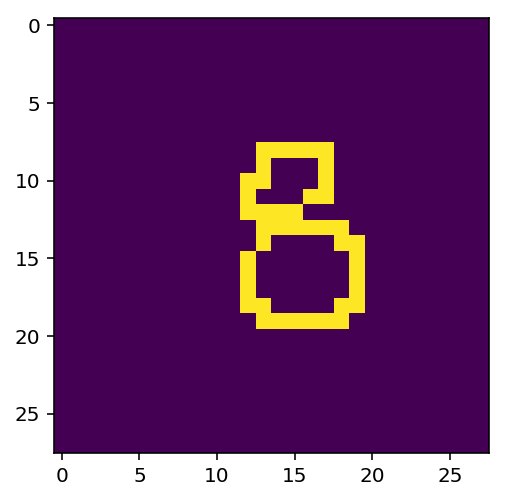

모델의 예측 : 7
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]


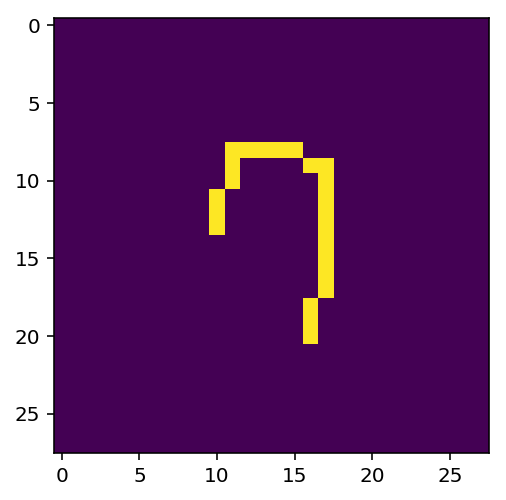

모델의 예측 : 7
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]


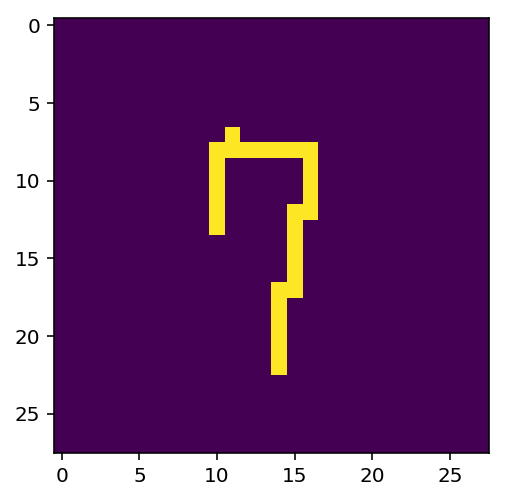

모델의 예측 : 9
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]


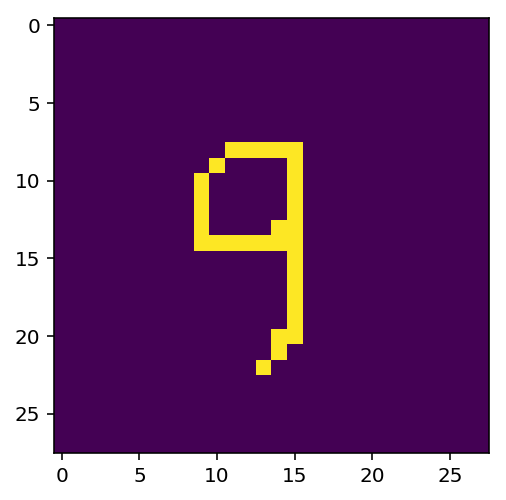

모델의 예측 : 0
모델의 카테고리별 확률 : [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


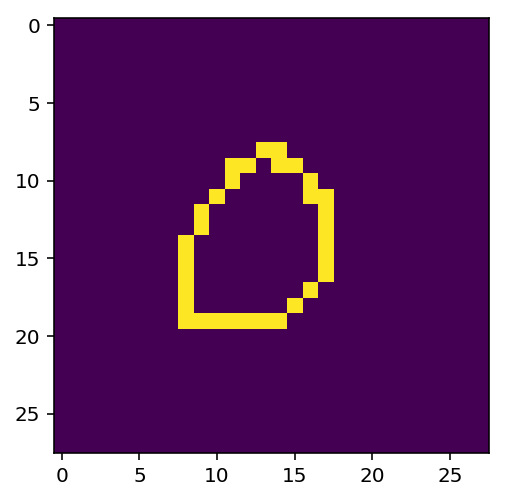

모델의 예측 : 3
모델의 카테고리별 확률 : [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]


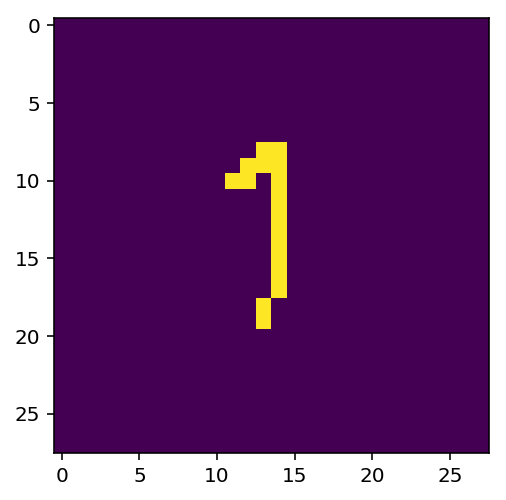

모델의 예측 : 2
모델의 카테고리별 확률 : [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.]


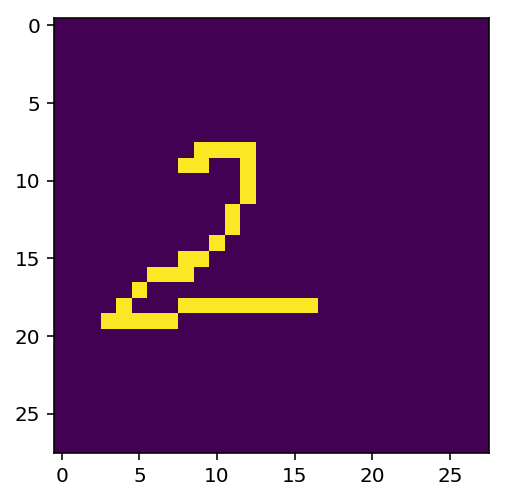

모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]


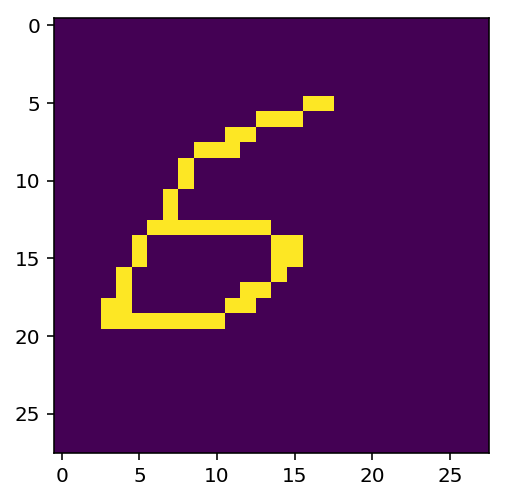

모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]


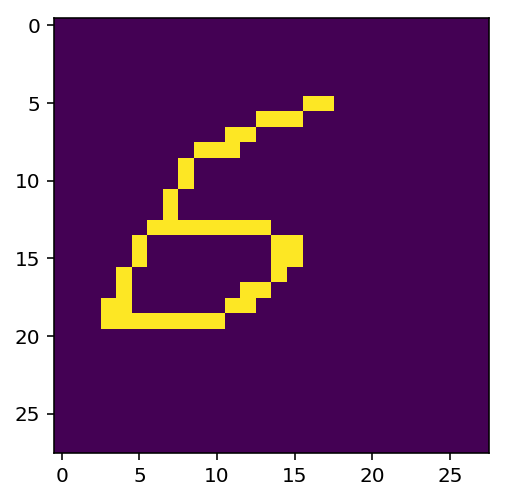

모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]


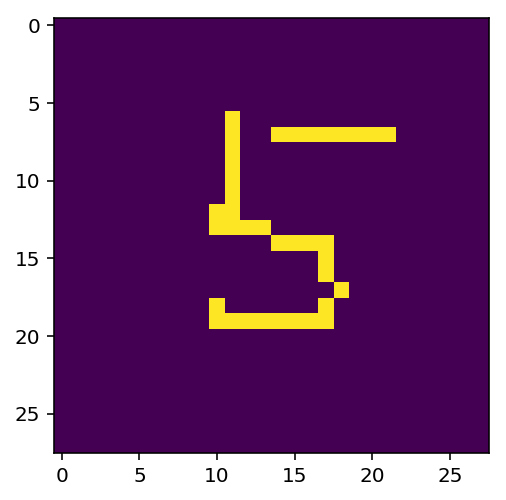

모델의 예측 : 2
모델의 카테고리별 확률 : [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.]


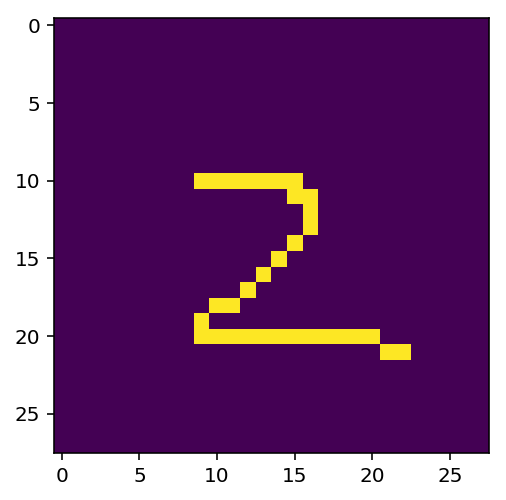

모델의 예측 : 3
모델의 카테고리별 확률 : [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]


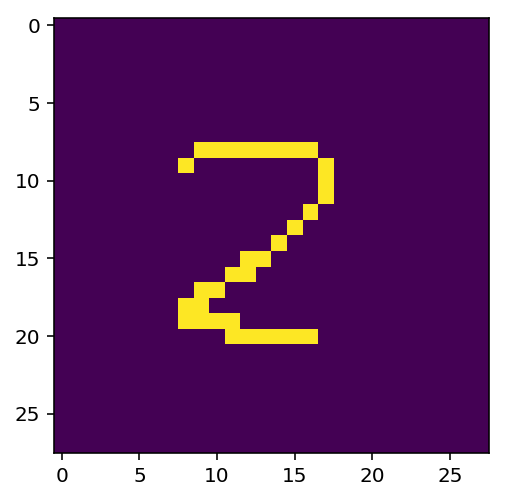

모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]


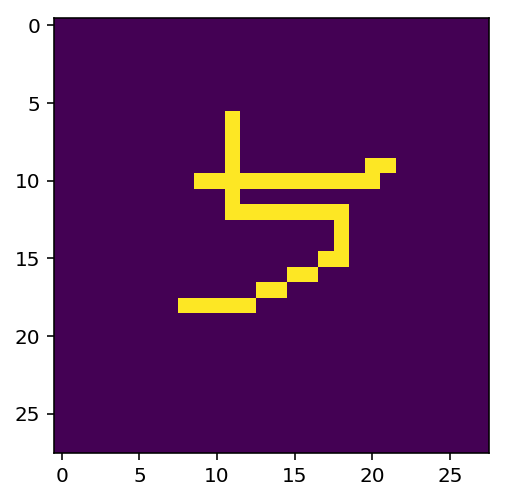

모델의 예측 : 6
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0. 100.   0.   0.   0.]


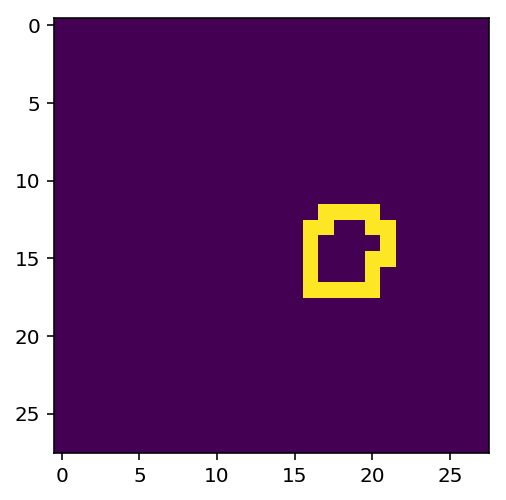

모델의 예측 : 3
모델의 카테고리별 확률 : [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]


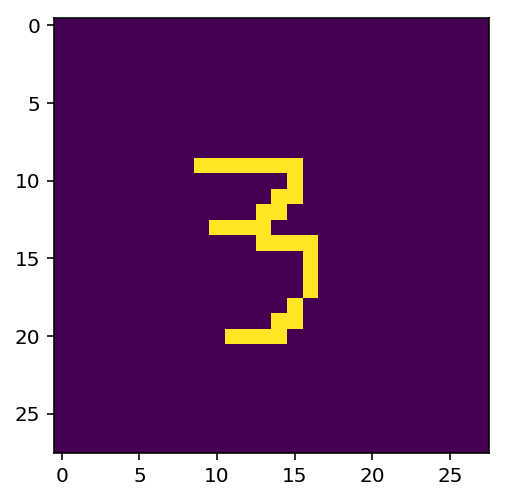

모델의 예측 : 9
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]


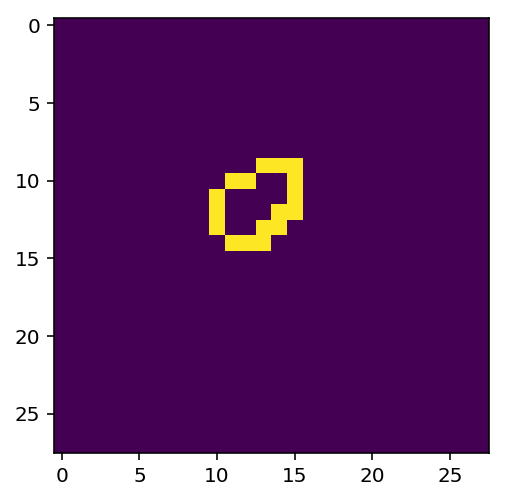

모델의 예측 : 9
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]


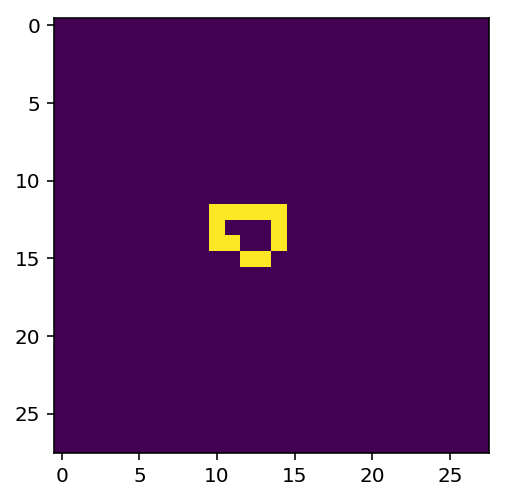

모델의 예측 : 4
모델의 카테고리별 확률 : [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.]


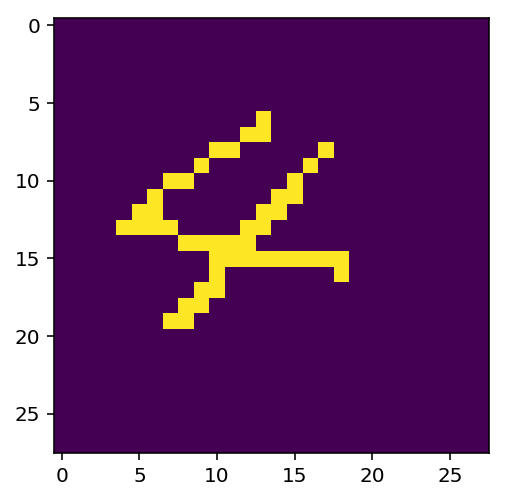

모델의 예측 : 3
모델의 카테고리별 확률 : [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]


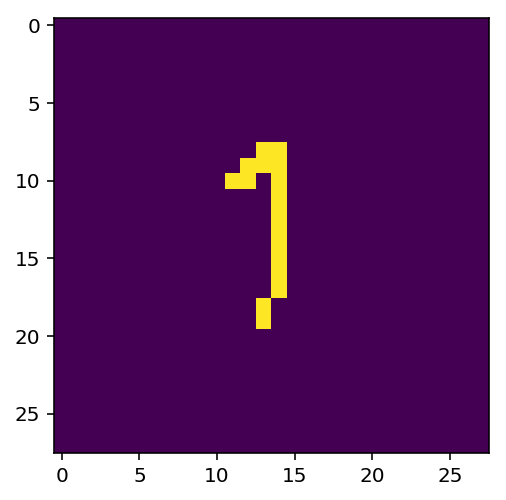

모델의 예측 : 6
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0. 100.   0.   0.   0.]


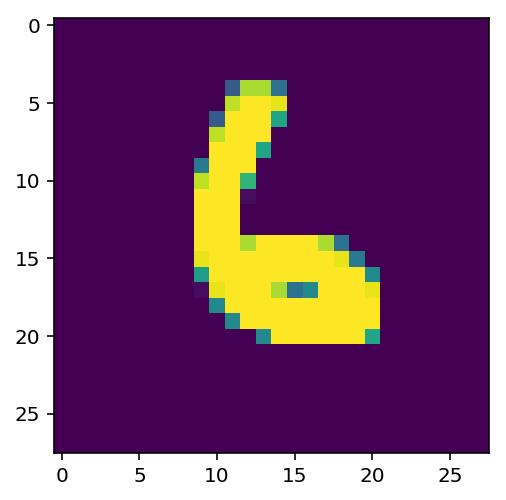

모델의 예측 : 0
모델의 카테고리별 확률 : [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


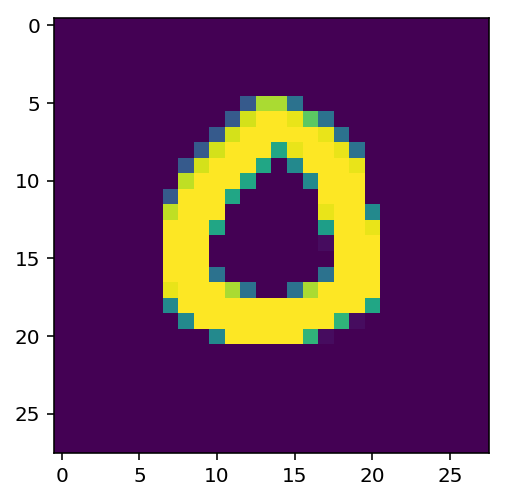

모델의 예측 : 6
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0. 100.   0.   0.   0.]


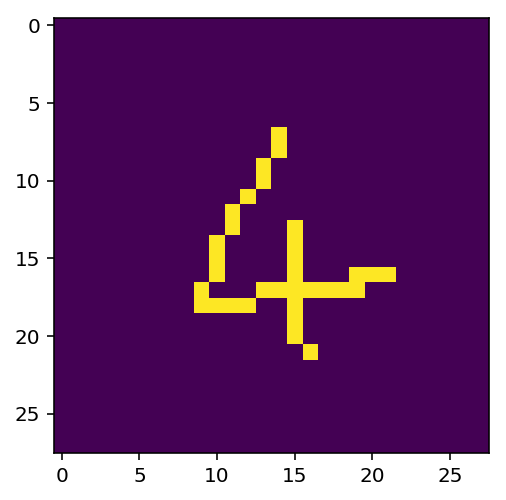

모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]


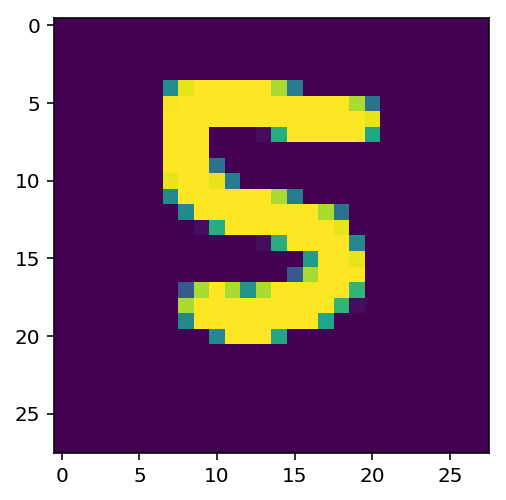

모델의 예측 : 2
모델의 카테고리별 확률 : [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.]


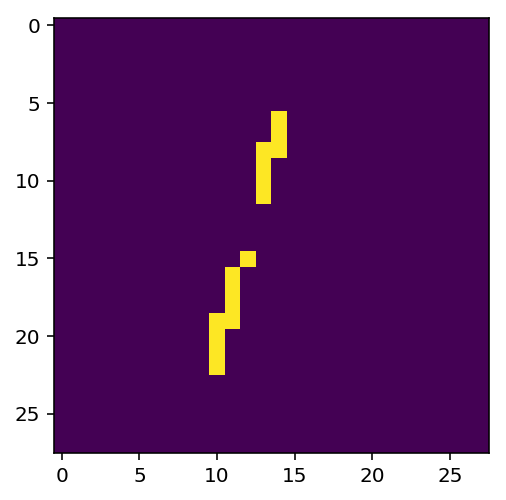

모델의 예측 : 8
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.]


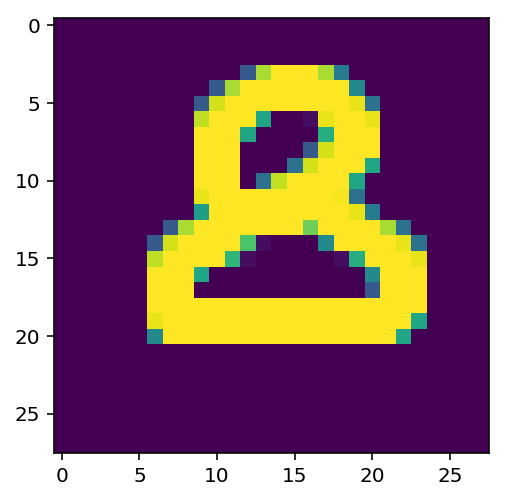

모델의 예측 : 9
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]


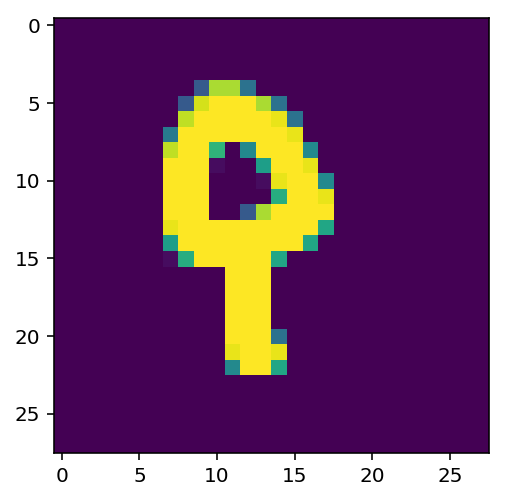

모델의 예측 : 7
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]


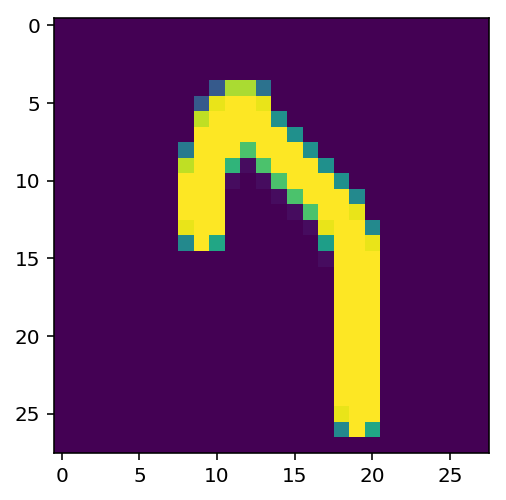

모델의 예측 : 3
모델의 카테고리별 확률 : [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]


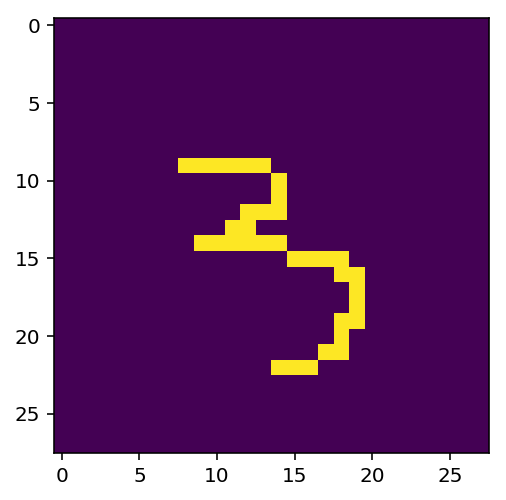

모델의 예측 : 2
모델의 카테고리별 확률 : [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.]


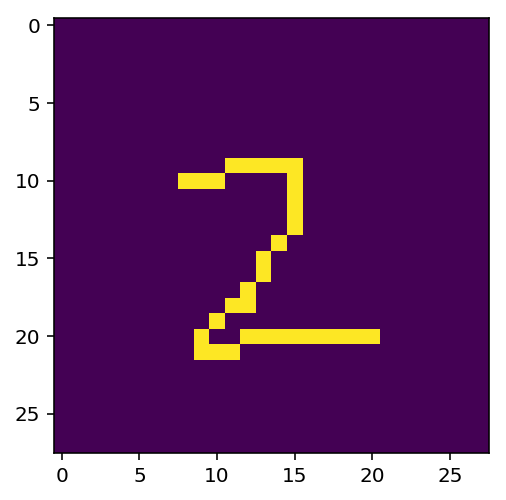

모델의 예측 : 4
모델의 카테고리별 확률 : [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.]


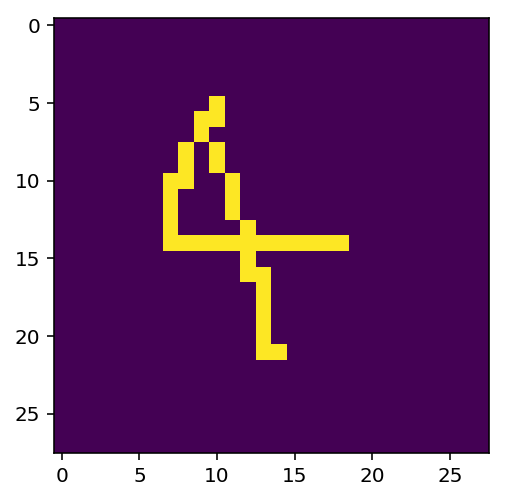

모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]


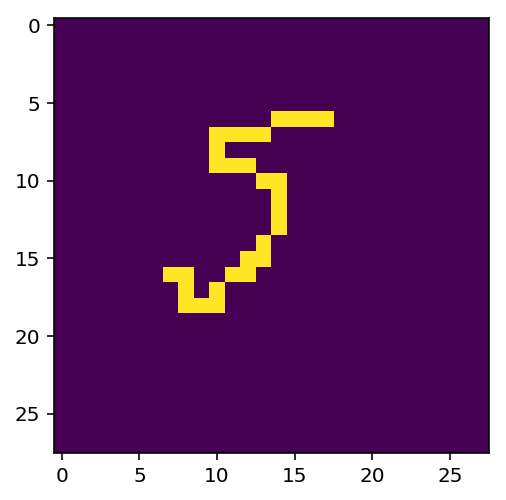

모델의 예측 : 9
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]


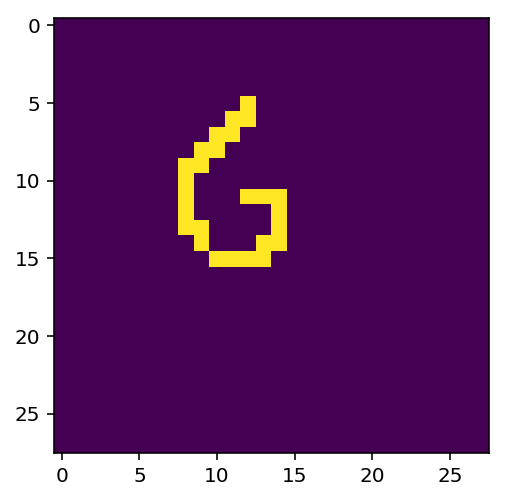

모델의 예측 : 3
모델의 카테고리별 확률 : [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]


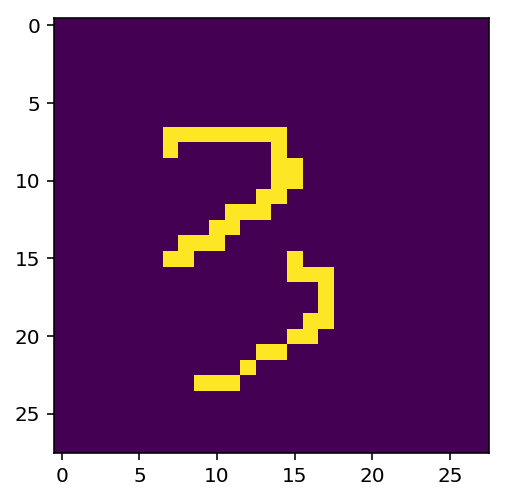

모델의 예측 : 0
모델의 카테고리별 확률 : [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


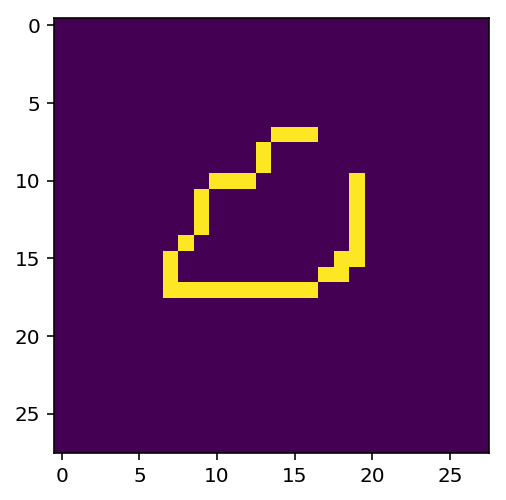

모델의 예측 : 7
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]


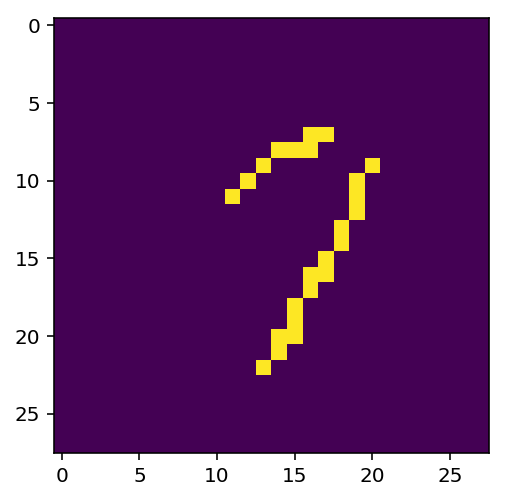

모델의 예측 : 9
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]


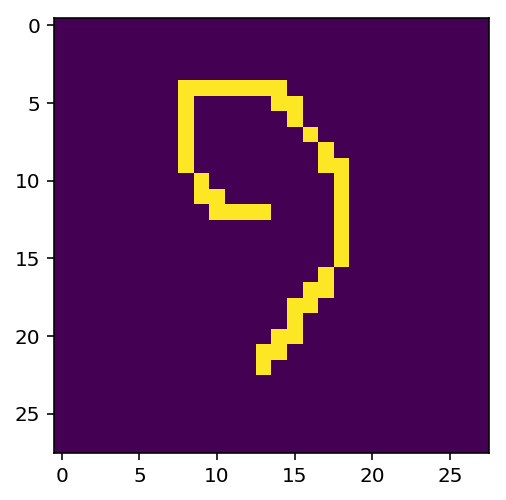

모델의 예측 : 8
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.]


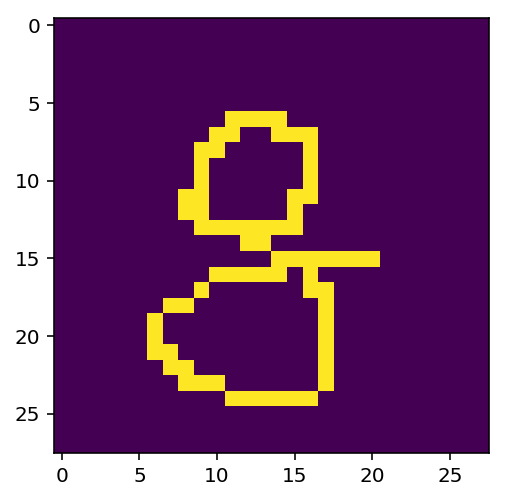

모델의 예측 : 1
모델의 카테고리별 확률 : [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.]


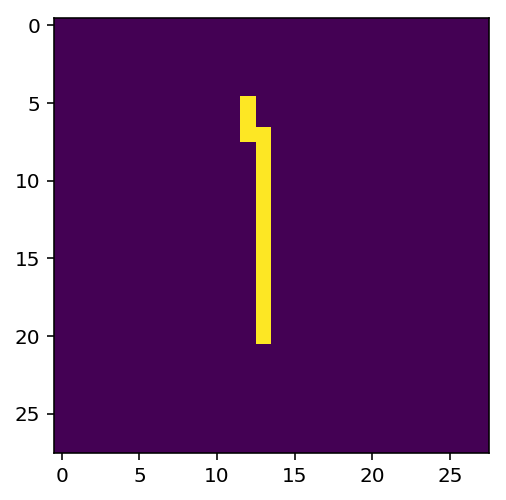

모델의 예측 : 3
모델의 카테고리별 확률 : [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]


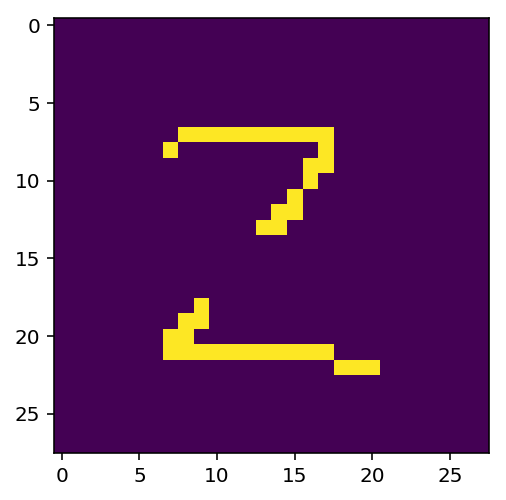

모델의 예측 : 1
모델의 카테고리별 확률 : [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.]


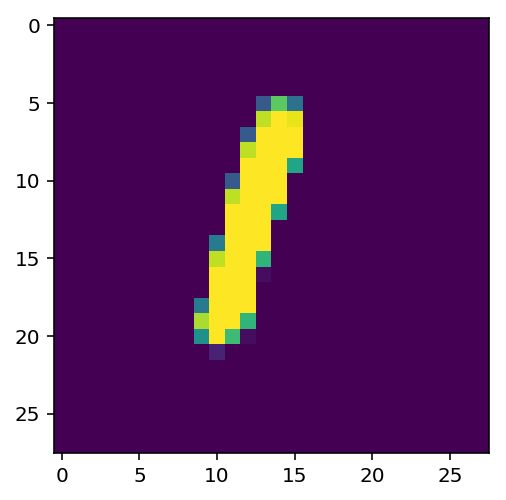

모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]


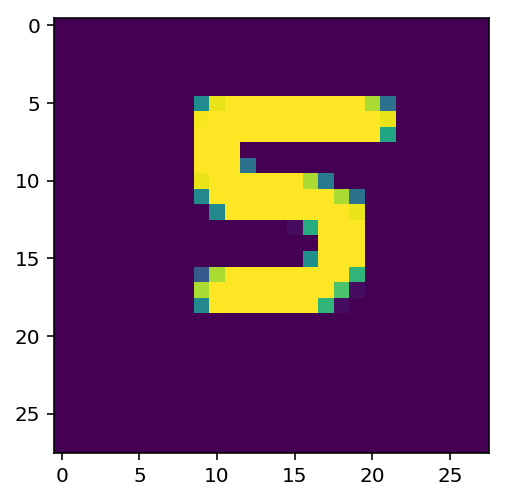

모델의 예측 : 9
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]


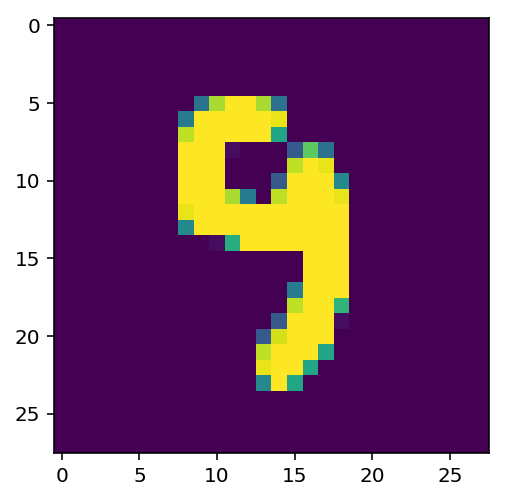

모델의 예측 : 4
모델의 카테고리별 확률 : [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.]


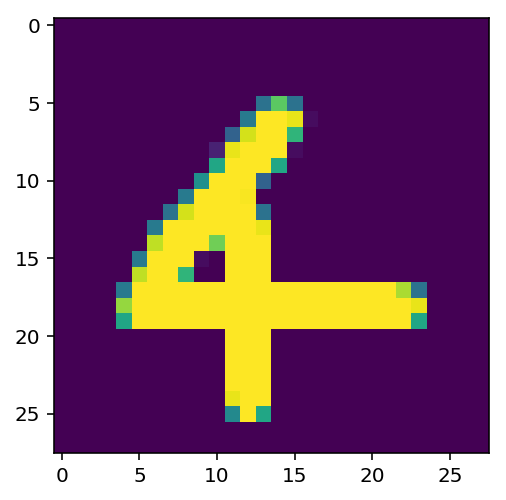

모델의 예측 : 4
모델의 카테고리별 확률 : [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.]


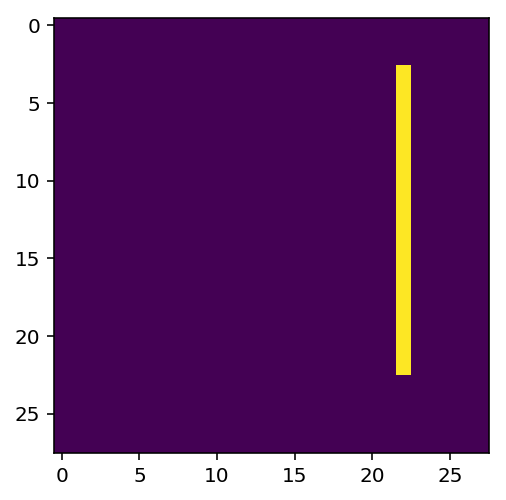

모델의 예측 : 3
모델의 카테고리별 확률 : [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]


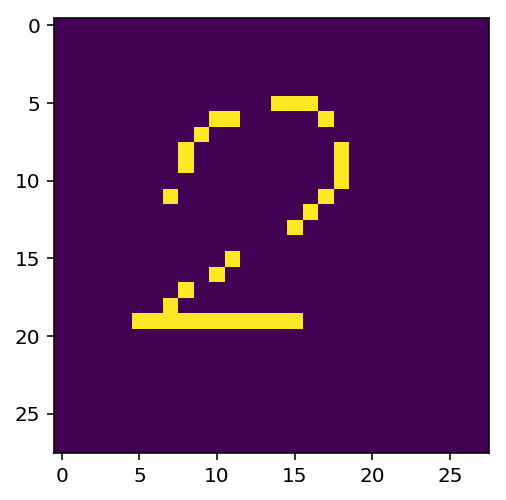

모델의 예측 : 1
모델의 카테고리별 확률 : [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.]


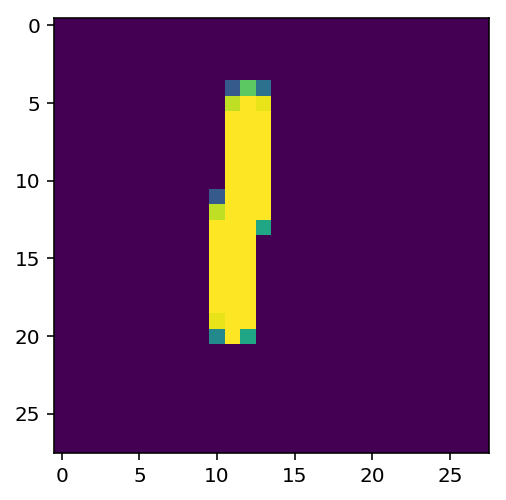

In [0]:
pred = model.predict(images)

for i in range(images.shape[0]) :
    print('모델의 예측 : {}'.format(pred[i].argmax() ))
    print('모델의 카테고리별 확률 : {}'.format(np.floor(pred[i]*100)))
    plt.imshow(images[i].reshape(28,28) )
    plt.show()

* MNIST에는 끊기거나 이상한 데이터가 없음
* 그래서 직접 만든 데이터는 새로운 패턴이다
* 과거에 없던 패턴이 들어오면 모델은 망가진다(예측률이 떨어짐)

* 새로 학습 시켜야한다.
 * '온라인 학습' 찾아보기
 
 * 오그멘테이션이 없었다면, 각도가 틀어진 이미지는 인식하지 못했다. (위 모델에는 확대, 각도 오그멘테이션을 설정해줬음)